# Twitter Sentiment Analysis

---

Sentiment analysis is a natural language processing (NLP) problem where machine learning models are employed to classify text data, such as tweets, into different sentiment categories, typically positive, negative, or neutral. This process involves various techniques from classification algorithms to text mining, analysis, and visualization methods.

# Problem Statement
---

The task at hand involves detecting hate speech in tweets, particularly focusing on tweets with racist or sexist sentiments. The objective is to classify tweets into two categories: those containing hate speech (labeled as '1') and those that do not (labeled as '0').

In essence, given a dataset of tweets along with their corresponding labels indicating whether they contain racist/sexist sentiments or not, the goal is to develop a model that accurately predicts these labels for tweets in a test dataset.

# Success Metrics
---
The evaluation metric for this task is the F1-Score.

# Objective
---
1) Detect Hate Speech: Accurately identify tweets with racist or sexist sentiments.

2) Binary Classification: Develop a model to categorize tweets as containing hate speech (1) or not (0).

3) Evaluation: Assess model performance using the F1-Score, balancing precision and recall.

### Importing Necessary Libraries

In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

### Load the datasets

In [42]:
train = pd.read_csv('Dataset/train_tweet.csv')
test = pd.read_csv('Dataset/test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


- The training dataset, named train_tweet.csv, consists of 31,962 samples or instances with 3 features or attributes. On the other hand, the test dataset, test_tweets.csv, contains 17,197 samples or instances with 2 features or attributes.

In [43]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [44]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [45]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [46]:
# checking out the negative comments from the train set

train[train['label'] == 1].head(10)


,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [47]:
# checking out the positive comments from the train set
train[train['label'] == 0].head(10)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


## Exploratory data analysis and data pre-processing

### Distribution of Positive and Negative Labels in Training Dataset

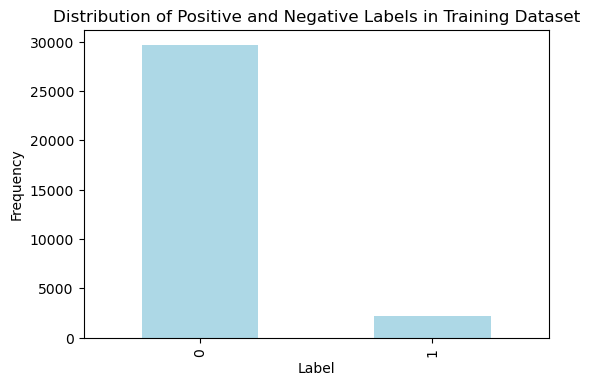

In [48]:

# Calculate label frequencies
label_counts = train['label'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color='lightblue')

# Add title and labels
plt.title('Distribution of Positive and Negative Labels in Training Dataset')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Show plot
plt.show()


### Distribution of Tweet Lengths in Training and Test Datasets

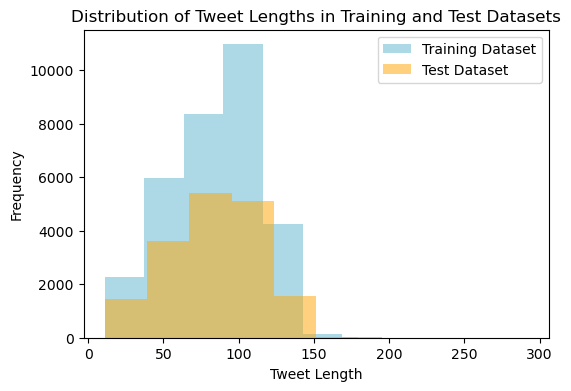

In [49]:
# checking the distribution of tweets in the data
# Visualize distribution of tweet lengths in the training dataset
length_train = train['tweet'].str.len().plot.hist(color='lightblue', figsize=(6, 4))

# Visualize distribution of tweet lengths in the test dataset
length_test = test['tweet'].str.len().plot.hist(color='orange', alpha=0.5, figsize=(6, 4))

# Add title and labels
plt.title('Distribution of Tweet Lengths in Training and Test Datasets')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')

# Add legend
plt.legend(['Training Dataset', 'Test Dataset'], loc='upper right')

# Show plot
plt.show()

### Adding Tweet Length as a Feature to the Dataset(Feature Engineering)

In [50]:
# Adding a new column 'len' to the training dataset to represent the length of each tweet
train['len'] = train['tweet'].str.len()

# Adding a new column 'len' to the test dataset to represent the length of each tweet
test['len'] = test['tweet'].str.len()

# Displaying the first 10 rows of the training dataset with the newly added 'len' column
train.head(10)


,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


### Summary Statistics by Label for Training Dataset

In [51]:
train.groupby('label').describe()


id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

### Relationship between Tweet Length and Mean Label Value

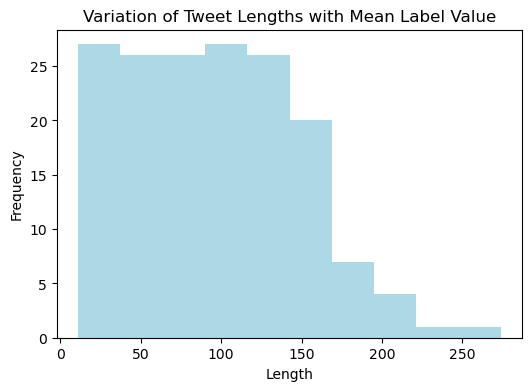

In [52]:
# Filter out non-numeric values in the 'len' column
numeric_lengths = pd.to_numeric(train['len'], errors='coerce')

# Group the numeric tweet lengths by value, calculate the mean label value for each length, and plot a histogram
numeric_lengths.groupby(numeric_lengths).mean().plot.hist(color='lightblue', figsize=(6, 4))

# Add a title to the plot
plt.title('Variation of Tweet Lengths with Mean Label Value')

# Add a label to the x-axis
plt.xlabel('Length')

# Display the plot
plt.show()


### Top 30 Most Frequently Occurring Words in Tweets

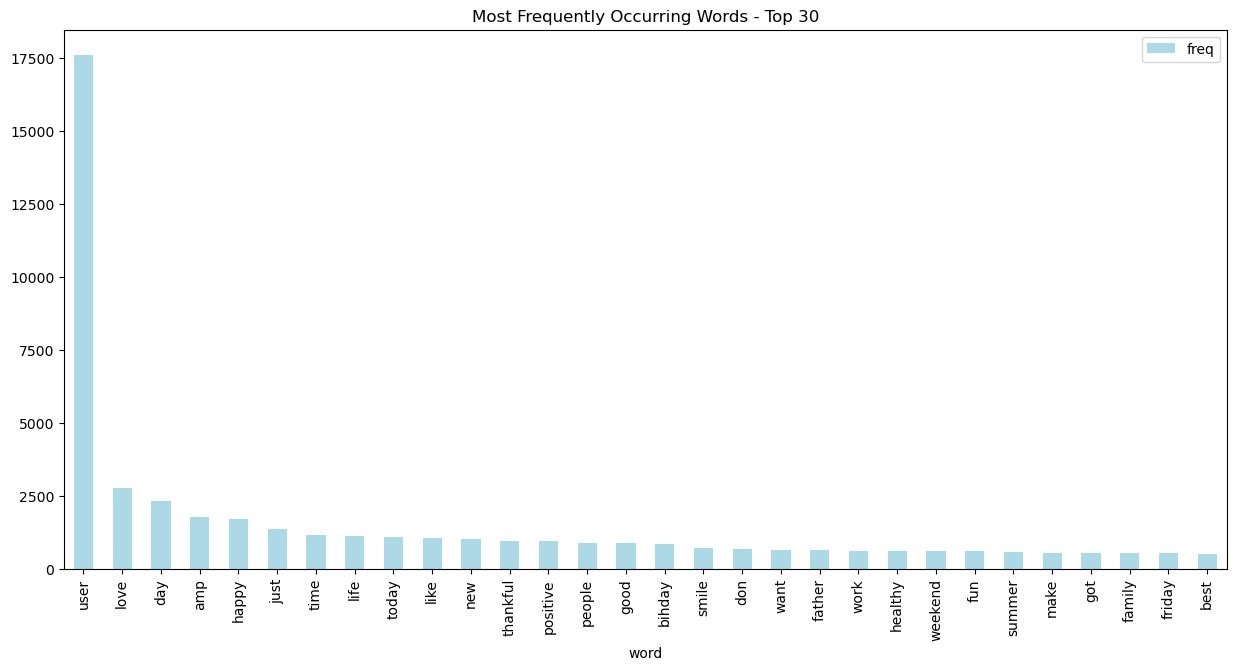

In [53]:
from sklearn.feature_extraction.text import CountVectorizer


# Initialize CountVectorizer with English stop words
cv = CountVectorizer(stop_words='english')

# Convert the tweet text data into a matrix of token counts
words = cv.fit_transform(train.tweet)

# Sum the counts of each word
sum_words = words.sum(axis=0)

# Get the frequency of each word and sort them
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Create a DataFrame for the word frequency
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

# Plot the top 30 most frequently occurring words
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color='lightblue')
plt.title("Most Frequently Occurring Words - Top 30")
plt.show()


- This visualization helps in understanding which words occur most frequently in the dataset, which can provide insights into the common themes or topics discussed in the tweets.

### Word Cloud of Most Frequent Words in Tweets

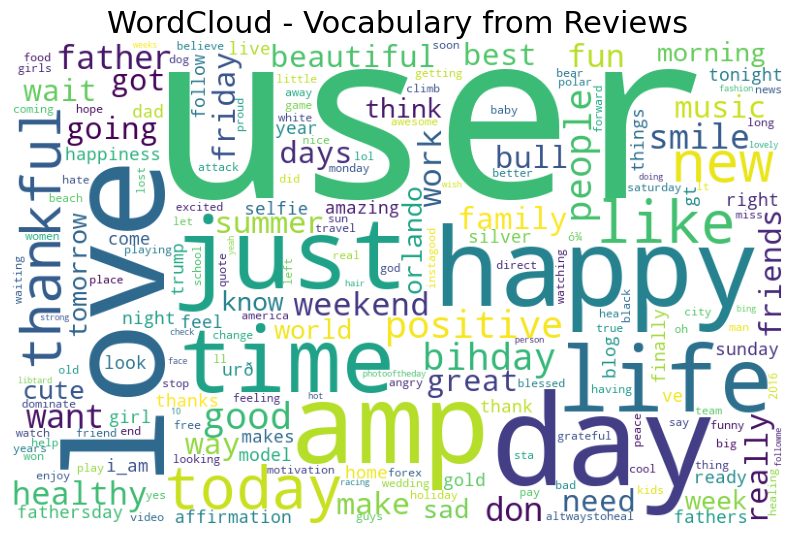

In [58]:
from wordcloud import WordCloud


# Generate word cloud from word frequencies
wordcloud = WordCloud(background_color='white', width=800, height=500).generate_from_frequencies(dict(words_freq))

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize=22)
plt.axis('off')  # Turn off axis
plt.show()


- This visualization provides a graphical representation of the most common words in the dataset, where the size of each word corresponds to its frequency. It offers a quick and intuitive way to understand the most prevalent terms in the text data.

### Word Cloud of Neutral Tweets

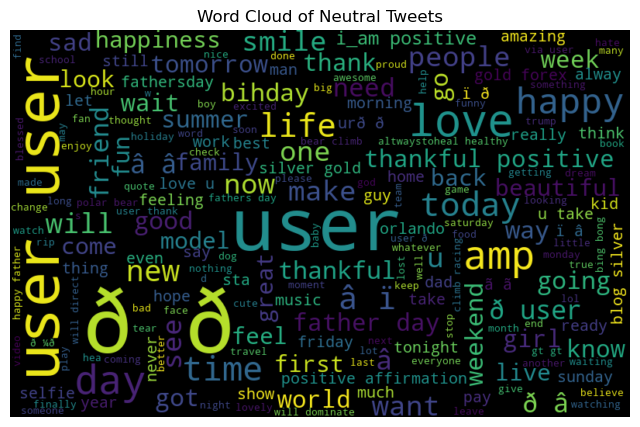

In [62]:
normal_words = ' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=0, max_font_size=110).generate(normal_words)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Neutral Tweets')
plt.show()


- This code generates a word cloud visualization for neutral (non-hate speech) tweets. It creates a word cloud based on the text content of tweets labeled as neutral (with label 0).

### Word Cloud of Negative Tweets

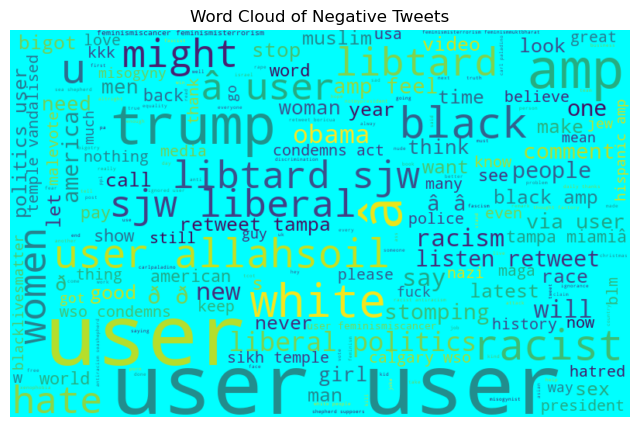

In [61]:
negative_words = ' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color='cyan', width=800, height=500, random_state=0, max_font_size=110).generate(negative_words)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Negative Tweets')
plt.show()


- This code generates a word cloud visualization for negative (hate speech) tweets. It creates a word cloud based on the text content of tweets labeled as negative (with label 1).

### Hashtag Extraction Function

In [63]:
import re

def hashtag_extract(x):
    return [re.findall(r"#(\w+)", tweet) for tweet in x]


In [64]:
# Extracting hashtags from non-racist/sexist tweets
HT_regular = sum(hashtag_extract(train['tweet'][train['label'] == 0]), [])

# Extracting hashtags from racist/sexist tweets
HT_negative = sum(hashtag_extract(train['tweet'][train['label'] == 1]), [])


- Hashtag Extraction from Non-Racist/Sexist Tweets

### Top 10 Most Frequent Hashtags in Non-Racist/Sexist Tweets


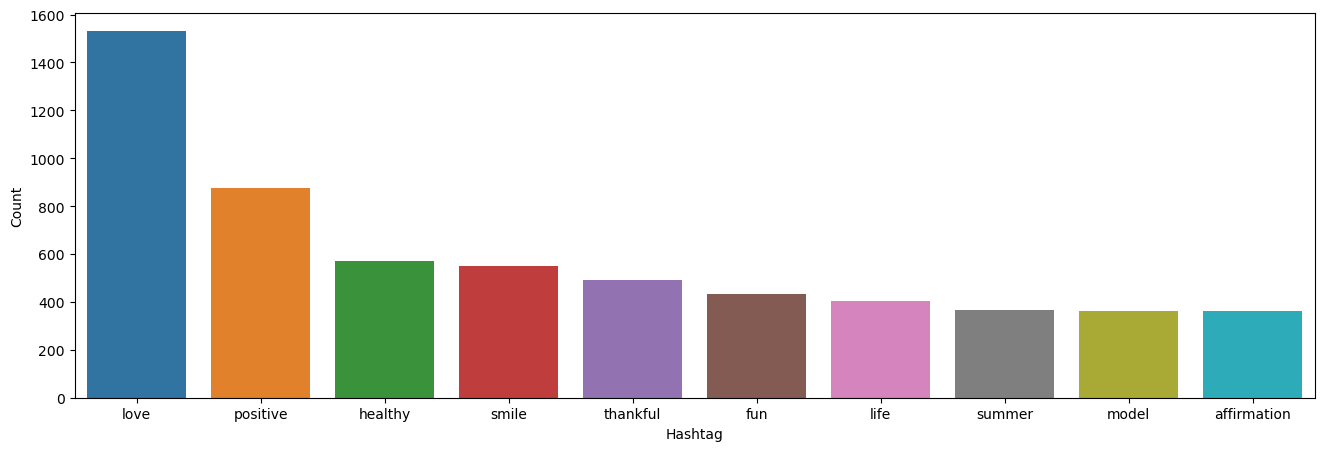

In [67]:
import nltk

# Create a frequency distribution of hashtags from non-racist/sexist tweets
freq_dist_regular = nltk.FreqDist(HT_regular)

# Convert the frequency distribution to a DataFrame
df_hashtags_regular = pd.DataFrame(freq_dist_regular.items(), columns=['Hashtag', 'Count'])

# Select the top 20 most frequent hashtags
df_top_hashtags_regular = df_hashtags_regular.nlargest(columns="Count", n=10)

# Plot the top 20 most frequent hashtags
plt.figure(figsize=(16,5))
sns.barplot(data=df_top_hashtags_regular, x="Hashtag", y="Count")
plt.ylabel('Count')
plt.show()
